In [20]:
import artm
import os
import matplotlib.pyplot as plt

In [21]:
path = 'C:\\NIVC\\Nivc_BigARTM_corpus\\unary_comm\\'
subd = "islamreviewru"
batch_vectorizer = artm.BatchVectorizer(data_path=path + "\\" + subd + "\\" + "batches_pos",
                                            data_format='batches')

In [22]:
modelARTM = artm.ARTM(topic_names=['topic_{}'.format(i) for i in xrange(100)],
                      scores=[artm.PerplexityScore(name='PerplexityScore', use_unigram_document_model=False, 
                                                   dictionary=batch_vectorizer.dictionary, class_ids=["text"]),
                              artm.SparsityPhiScore(name='SparsityPhiScore', class_id="text"),
                              artm.SparsityThetaScore(name='SparsityThetaScore'),
                              artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.3, class_id="text"),
                              artm.TopTokensScore(name='TopTokensScore', num_tokens=100, class_id="text")], 
                      cache_theta=True)

In [23]:
modelARTM.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.3))
modelARTM.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.3,class_ids=["text"]))
modelARTM.regularizers.add(artm.DecorrelatorPhiRegularizer(name='DecorrelatorPhi', tau=5e+5, class_ids=["text"]))
modelARTM.regularizers.add(artm.ImproveCoherencePhiRegularizer(name='CoherencePhi', tau=0.1, class_ids=["text"]))
modelARTM.regularizers.add(artm.TopicSelectionThetaRegularizer(name='TopicSelectionTheta', tau=0.1))

In [24]:
modelARTM.initialize(dictionary=batch_vectorizer.dictionary)

In [25]:
modelARTM.num_document_passes = 3

In [26]:
modelARTM.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes = 70)

## Создаем объект класса модели PLSA

In [27]:
modelPLSA = artm.ARTM(topic_names=['topic_{}'.format(i) for i in xrange(100)],
                      scores=[artm.PerplexityScore(name='PerplexityScore', use_unigram_document_model=False,
                                                   dictionary=batch_vectorizer.dictionary, class_ids=["text"]),
                              artm.SparsityPhiScore(name='SparsityPhiScore', class_id="text"),
                              artm.SparsityThetaScore(name='SparsityThetaScore'),
                              artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.3, class_id="text"),
                              artm.TopTokensScore(name='TopTokensScore', num_tokens=100, class_id="text")],
                      cache_theta=True)

In [28]:
modelPLSA.initialize(dictionary=batch_vectorizer.dictionary)

In [29]:
modelPLSA.num_document_passes = 3

In [30]:
modelPLSA.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes = 70)

## Значения перплексии

In [31]:
print "===========================ARTM PerplexityScore start===================================="
print modelARTM.score_tracker['PerplexityScore'].value
print "===========================ARTM PerplexityScore end======================================"
print "===========================PLSA PerplexityScore start===================================="
print modelPLSA.score_tracker['PerplexityScore'].value
print "===========================PLSA PerplexityScore end======================================"

===========================ARTM PerplexityScore start====================================
[150806.44601889222, 2066.555689068638, 1854.1076404598148, 1300.7438825632373, 1152.1230245476909, 1013.0899141800055, 965.5450031354884, 923.454477798745, 901.783299171946, 880.3168865412179, 864.9294692791948, 850.472521824355, 839.1845744954433, 828.8657665869998, 820.7985770766717, 813.9504765131544, 808.5207496616182, 803.8110503005433, 799.8517877713866, 796.3188392338138, 793.2410133639215, 790.4742459705168, 788.0385206245714, 785.849763868998, 783.9109210280435, 782.1573186165399, 780.5801544380574, 779.1409715663023, 777.8372250095143, 776.6472168257787, 775.5685167144209, 774.5848048073786, 773.6878726727673, 772.8652787588952, 772.1143596107077, 771.431726558865, 770.811686006919, 770.2439385690141, 769.7201163209877, 769.2338216526617, 768.7785248217127, 768.3507103517005, 767.9483409139106, 767.5699995413337, 767.2143089992245, 766.8792684571421, 766.5637652638758, 766.2661121108753

## Параметры полученной модели

In [32]:
print 'Sparsity Phi: {0:.3f} (PLSA) vs. {1:.3f} (ARTM)'.format(
    modelPLSA.score_tracker['SparsityPhiScore'].last_value,
    modelARTM.score_tracker['SparsityPhiScore'].last_value)

print 'Sparsity Theta: {0:.3f} (PLSA) vs. {1:.3f} (ARTM)'.format(
    modelPLSA.score_tracker['SparsityThetaScore'].last_value,
    modelARTM.score_tracker['SparsityThetaScore'].last_value)

print 'Kernel contrast: {0:.3f} (PLSA) vs. {1:.3f} (ARTM)'.format(
    modelPLSA.score_tracker['TopicKernelScore'].last_average_contrast,
    modelARTM.score_tracker['TopicKernelScore'].last_average_contrast)

print 'Kernel purity: {0:.3f} (PLSA) vs. {1:.3f} (ARTM)'.format(
    modelPLSA.score_tracker['TopicKernelScore'].last_average_purity,
    modelARTM.score_tracker['TopicKernelScore'].last_average_purity)

print 'Perplexity: {0:.3f} (PLSA) vs. {1:.3f} (ARTM)'.format(
    modelPLSA.score_tracker['PerplexityScore'].last_value,
    modelARTM.score_tracker['PerplexityScore'].last_value)

Sparsity Phi: 0.939 (PLSA) vs. 0.994 (ARTM)
Sparsity Theta: 0.006 (PLSA) vs. 0.577 (ARTM)


Kernel contrast: 0.784 (PLSA) vs. 0.734 (ARTM)


Kernel purity: 0.346 (PLSA) vs. 0.652 (ARTM)
Perplexity: 769.908 (PLSA) vs. 762.366 (ARTM)


## Строим график перплексии

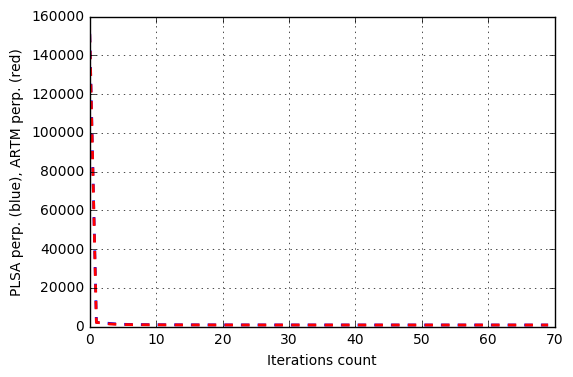

In [33]:
plt.plot(
    xrange(modelPLSA.num_phi_updates), modelPLSA.score_tracker['PerplexityScore'].value, 'b--',
    xrange(modelARTM.num_phi_updates), modelARTM.score_tracker['PerplexityScore'].value, 'r--', 
    linewidth=2)
plt.xlabel('Iterations count')
plt.ylabel('PLSA perp. (blue), ARTM perp. (red)')
plt.grid(True)
plt.show()

## Выводим графики изменения разреженностей матриц по итерациям

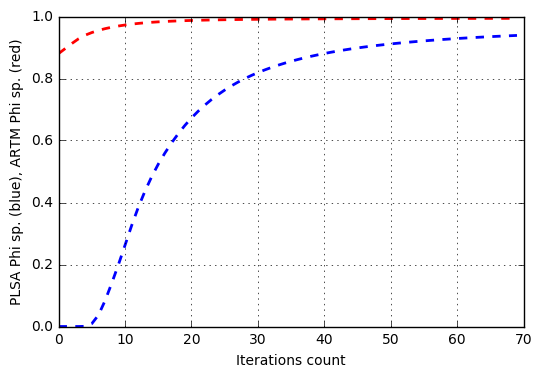

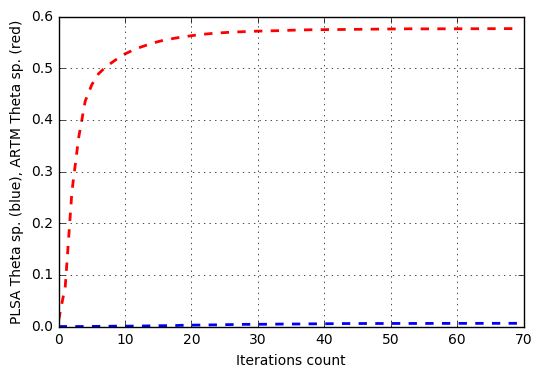

In [34]:
plt.plot(
    xrange(modelPLSA.num_phi_updates), modelPLSA.score_tracker['SparsityPhiScore'].value, 'b--',
    xrange(modelARTM.num_phi_updates), modelARTM.score_tracker['SparsityPhiScore'].value, 'r--', linewidth=2)
plt.xlabel('Iterations count')
plt.ylabel('PLSA Phi sp. (blue), ARTM Phi sp. (red)')
plt.grid(True)
plt.show()

plt.plot(
    xrange(modelPLSA.num_phi_updates), modelPLSA.score_tracker['SparsityThetaScore'].value, 'b--',
    xrange(modelARTM.num_phi_updates), modelARTM.score_tracker['SparsityThetaScore'].value, 'r--', linewidth=2)
plt.xlabel('Iterations count')
plt.ylabel('PLSA Theta sp. (blue), ARTM Theta sp. (red)')
plt.grid(True)
plt.show()

# Выводим топики моделей

In [14]:
import os
if not os.path.exists(path+subd+"\\PLSA_model"):
    os.makedirs(path+subd+"\\PLSA_model", mode=0o777)
if not os.path.exists(path+subd+"\\PLSA_topics"):
    os.makedirs(path+subd+"\\PLSA_topics", mode=0o777)
if not os.path.exists(path+subd+"\\ARTM_model"):
    os.makedirs(path+subd+"\\ARTM_model", mode=0o777)
if not os.path.exists(path+subd+"\\ARTM_topics"):
    os.makedirs(path+subd+"\\ARTM_topics", mode=0o777)

## Модель PLSA

## Модель ARTM

## матрица Fi

## Матрица Theta

In [35]:
print "======save ARTM========"
modelARTM.save(filename=path+subd+"\\ARTM_model\\"+subd+".p_wt.model",model_name='p_wt')
modelARTM.save(filename=path+subd+"\\ARTM_model\\"+subd+".n_wt.model",model_name='n_wt')

======save ARTM========


In [17]:
import io
print "======save ARTM topics========"
with io.open(path+subd+"\\ARTM_topics"+'\\100.topics','w',encoding='utf8') as outputTopics:
    try:
        outputTopics.write(u'{\n')
        j = 0
        #topic_names = [key for key in modelARTM.score_tracker['TopTokensScore'].last_tokens]
        for topic_name in modelARTM.topic_names:
            #print topic_name + "\n"
            outputTopics.write(u"\""+unicode(topic_name + u'\": '))
            outputTopics.write(u"{")
            i = 0
            lenTopic = len(modelARTM.score_tracker['TopTokensScore'].last_tokens[topic_name])-1
            topicWords = modelARTM.score_tracker['TopTokensScore'].last_tokens[topic_name]
            topicWeights = modelARTM.score_tracker['TopTokensScore'].weights[0][topic_name]
            for word in topicWords:
                #print word + "\n"
                outputTopics.write(u"\""+unicode(word)+u"\": "+unicode(str(topicWeights[i])))
                if i != lenTopic:
                    outputTopics.write(u",\n")
                i += 1
            outputTopics.write(u"}")
            if j != len(modelARTM.topic_names)-1:
                outputTopics.write(u",\n")
            j += 1
        outputTopics.write(u"\n}")
    except Exception as e:
        print(e)
    outputTopics.close()

======save ARTM topics========


In [36]:
print "======save PLSA========"
modelPLSA.save(filename=path+subd+"\\PLSA_model\\"+subd+".p_wt.model",model_name='p_wt')
modelPLSA.save(filename=path+subd+"\\PLSA_model\\"+subd+".n_wt.model",model_name='n_wt')

======save PLSA========


In [24]:
print "======save PLSA topics========"
with io.open(path+subd+"\\PLSA_topics"+'\\100.topics','w',encoding='utf8') as outputTopics:
    try:
        outputTopics.write(u'{\n')
        j = 0
        #topic_names = [key for key in modelPLSA.score_tracker['TopTokensScore'].last_tokens]
        for topic_name in modelPLSA.topic_names:
            #print topic_name + "\n"
            outputTopics.write(u"\""+unicode(topic_name + u'\": '))
            outputTopics.write(u"{")
            i = 0
            lenTopic = len(modelPLSA.score_tracker['TopTokensScore'].last_tokens[topic_name])-1
            topicWords = modelPLSA.score_tracker['TopTokensScore'].last_tokens[topic_name]
            topicWeights = modelPLSA.score_tracker['TopTokensScore'].weights[0][topic_name]
            for word in topicWords:
                #print word + "\n"
                outputTopics.write(u"\""+unicode(word)+u"\": "+unicode(str(topicWeights[i])))
                if i != lenTopic:
                    outputTopics.write(u",\n")
                i += 1
            outputTopics.write(u"}")
            if j != len(modelPLSA.topic_names)-1:
                outputTopics.write(u",\n")
            j += 1
        outputTopics.write(u"\n}")
    except Exception as e:
        print(e)
    outputTopics.close()

======save PLSA topics========


KeyboardInterrupt: 